In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Let us generate some nonlinear data, based on a simple quadratic equation $x^2+x+2$ (plus some Gaussian noise)

Text(0, 0.5, 'response y')

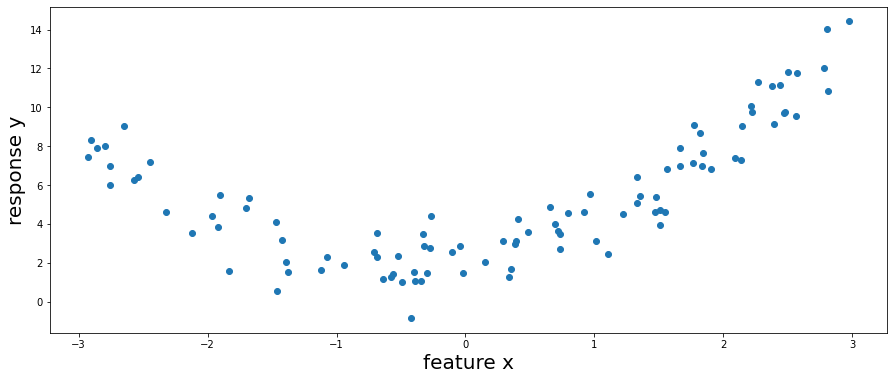

In [2]:
m = 100
X = 6*np.random.rand(m,1)-3
y = X**2+X+2+np.random.randn(m,1)
plt.figure(figsize=(15,6))
plt.scatter(X,y)
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)

Let us split the dataset, so that 3/4 of it is used to train the model, after which we measure the model's performance on the remaining 1/4.

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

## Linear Regression

Clearly, a straight line $y = \theta_0 + \theta_1x$ will never fit this data properly:

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

RMSE on training set: 7.86
RMSE on testing set: 10.5


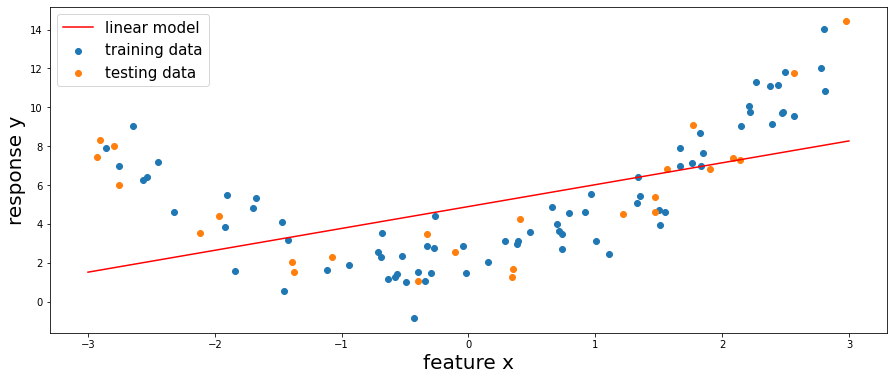

In [5]:
# fit a linear model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

#RMSE on train set
y_train_pred = linreg.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)

#RMSE on test set
y_test_pred = linreg.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)

# plot the linear model
m_plot = 100
X_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = linreg.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='linear model')

# plot dataset
plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='testing data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=15)

# display RMSEs
print('RMSE on training set: '+str(np.round(rmse_train,2)))
print('RMSE on testing set: '+str(np.round(rmse_test,2)))

The linear model is underfitting the data

## Polynomial regression

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=2,include_bias=False)),
    ('scaler',StandardScaler()),
    ('reg', LinearRegression())
])
pipe

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [7]:
# alternative pipeline
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=2,include_bias=False)),
    ('reg', LinearRegression())
])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

RMSE on training set: 1.26
RMSE on testing set: 1.1


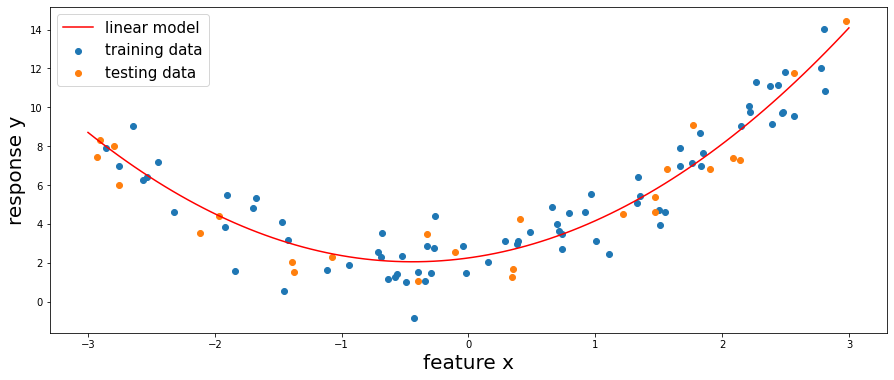

In [8]:
# fit the pipeline
pipe.fit(X_train,y_train)

#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)

#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)

# plot the linear model
m_plot = 100
X_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='linear model')

# plot dataset
plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='testing data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=15)

# display RMSEs
print('RMSE on training set: '+str(np.round(rmse_train,2)))
print('RMSE on testing set: '+str(np.round(rmse_test,2)))

## Overfitting

If we perform high-degree polynomial regression, we will likely fit the training data much better than with plain Linear Regression.
But the model will severely overfit the training data.

RMSE on training set: 1.38
RMSE on testing set: 128294099133.66


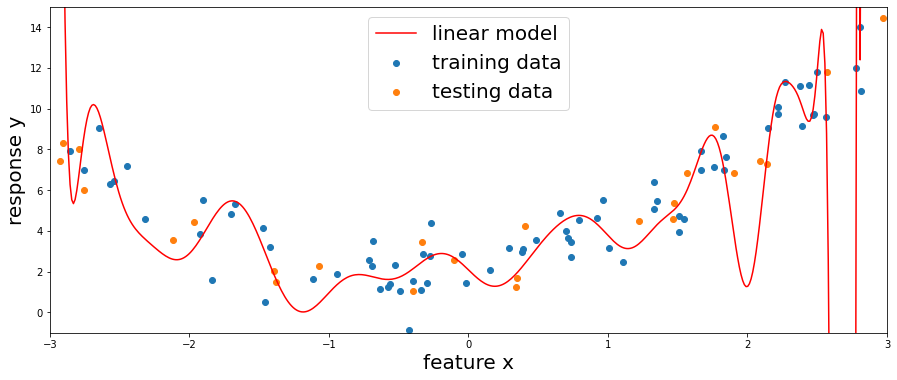

In [9]:
# high-degree polynomial regression
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=75,include_bias=False)),
    ('reg', LinearRegression())
])


# fit the pipeline
pipe.fit(X_train,y_train)

#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)

#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)

# plot the linear model
m_plot = 500
X_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='linear model')

# plot dataset
plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='testing data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)
plt.xlim([-3,3])
plt.ylim([-1,15])

# display RMSEs
print('RMSE on training set: '+str(np.round(rmse_train,2)))
print('RMSE on testing set: '+str(np.round(rmse_test,2)))



Notice how the 75-degree polynomial model wiggles around to get as close as possible to the training data points

In [21]:
pipe['poly_features'].degree 

10

In [10]:
# The higher your regression model degree, the more likely you are to overfit the data
rmse_train = []
rmse_test = []
max_deg = 30
for degree in range(1,max_deg):
    
    # set polynomial features degree to degree
    pipe['poly_features'].degree = degree
    # fit the pipeline
    pipe.fit(X_train,y_train)
    #RMSE on train set
    y_train_pred = pipe.predict(X_train)
    rmse_train.append(mean_squared_error(y_train,y_train_pred))
    #RMSE on test set
    y_test_pred = pipe.predict(X_test)
    rmse_test.append(mean_squared_error(y_test,y_test_pred))

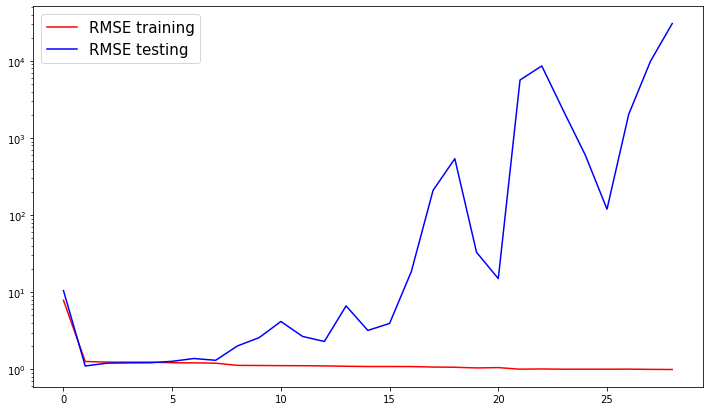

In [11]:
plt.figure(figsize=(12,7))
plt.semilogy(rmse_train,'r', label='RMSE training')
plt.semilogy(rmse_test,'b', label='RMSE testing')
plt.legend(fontsize=15)

Having large model coefficients can be seen as evidence of overfitting:

In [12]:
pipe['reg'].coef_

array([[-1.33340455e+03,  1.61681366e+05, -7.73477633e+06,
         2.00639634e+08, -3.24011274e+09,  3.50926999e+10,
        -2.66705886e+11,  1.46207556e+12, -5.86107819e+12,
         1.71711869e+13, -3.60017518e+13,  5.06904990e+13,
        -3.86486627e+13, -4.44252328e+12,  3.76855510e+13,
        -1.67703273e+13, -2.77895872e+13,  2.23026898e+13,
         2.26408376e+13, -2.32470806e+13, -2.03582317e+13,
         2.34045609e+13,  1.87020628e+13, -2.71265638e+13,
        -1.12436606e+13,  3.68649679e+13, -2.71133223e+13,
         9.14636987e+12, -1.23335171e+12]])

<BarContainer object of 29 artists>

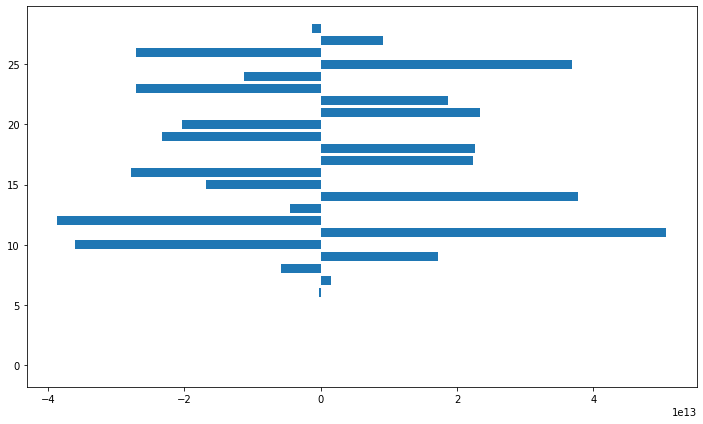

In [13]:
plt.figure(figsize=(12,7))
plt.barh(y = list(range(degree)), width=pipe['reg'].coef_.flatten())

## Regularization

One way to reduce overfittin is to **regularize the model**, this is, to contrain it: the fewer degrees of freedom it has, the harder it  will be for it to over fit the data.
Regularization is typically achieved by **constraining the model coefficients**

### Ridge Regression

To train a Ridge Regression model, one needs to find the coefficients $\theta_i$ that minimize:

$$
\mathrm{RMSE} + \alpha \sum_{i=1}^n \theta_i^2 
$$

This forces the model to not only fit the data but also keep the model coefficients as small as possible.
The **hyperparameter $\alpha$** controls how much you want to regularize the model.
- If $\alpha=0$, then Ridge Regression is just Linear Regression.
- If $\alpha$ is very large, then all coefficients end up very close to zero and the result is a flat line goint through the data's mean.

In [15]:
from sklearn.linear_model import Ridge

The code below trains a Ridge Regression model. 
You can play with different values of the regularization hyperparameter $\alpha$.

RMSE on training set: 1.51
RMSE on testing set: 18.4


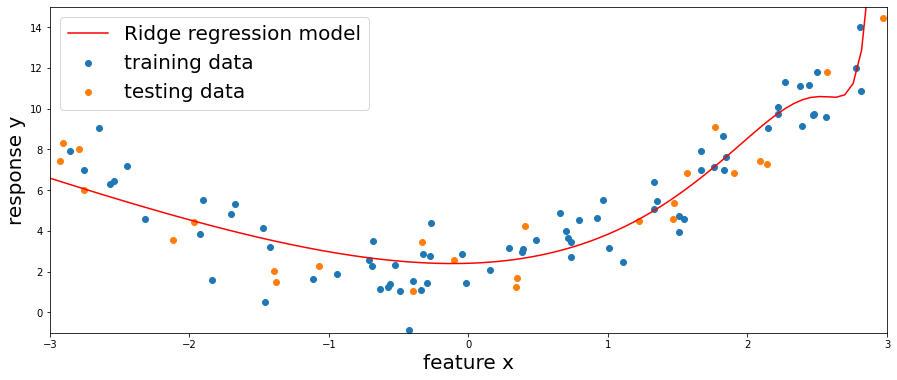

In [29]:
# Ridge regularization
degree=75 
alpha=0.1


pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=degree,include_bias=False)),
    ('reg', Ridge(alpha=alpha))
])

# fit the pipeline
pipe.fit(X_train,y_train)
#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)
#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)
# plot the linear model
m_plot = 100
X_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='Ridge regression model')
# plot dataset
plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='testing data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)
plt.xlim([-3,3])
plt.ylim([-1,15])

# display RMSEs
print('RMSE on training set: '+str(np.round(rmse_train,2)))
print('RMSE on testing set: '+str(np.round(rmse_test,2)))

<BarContainer object of 75 artists>

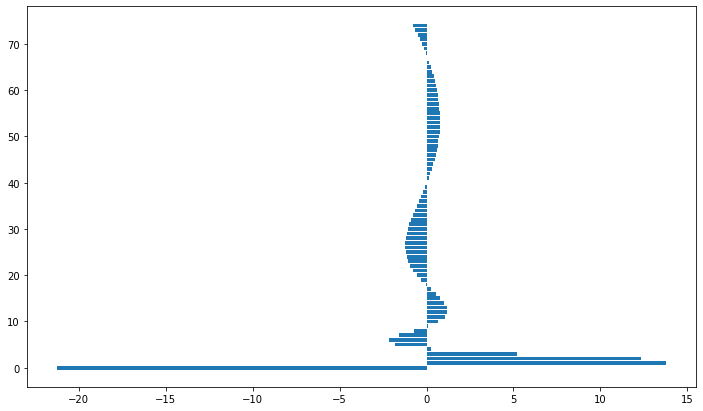

In [24]:
plt.figure(figsize=(12,7))
plt.barh(y = list(range(degree)), width=pipe['reg'].coef_.flatten())

### Lasso (Least Absolute Shrinkage and Selection Operator) Regularization 

To train a Ridge Regression model, one needs to find the coefficients $\theta_i$ that minimize:

$$
\mathrm{RMSE} + \alpha \sum_{i=1}^n |\theta_i| 
$$

An important characteristic of Lasso Regression is that it tends to eliminate the coefficients of the least important features (this is, set them to zero).

In [41]:
from sklearn.linear_model import Lasso

RMSE on training set: 1.84
RMSE on testing set: 1.06


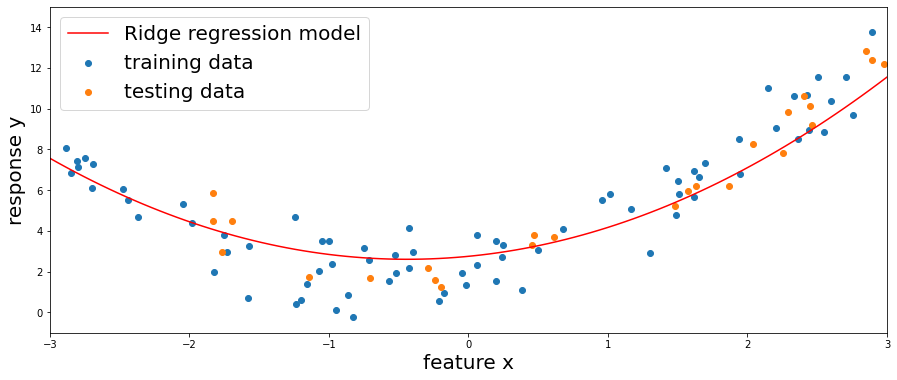

In [47]:
# Lasso regularization
degree=75
alpha = 0.5

pipe = Pipeline(steps=[
    ('poly_features', PolynomialFeatures(degree=degree,include_bias=False)),
    ('scaler',StandardScaler()),
    ('reg', Lasso(alpha=alpha)) 
])

# fit the pipeline
pipe.fit(X_train,y_train)
#RMSE on train set
y_train_pred = pipe.predict(X_train)
rmse_train = mean_squared_error(y_train,y_train_pred)
#RMSE on test set
y_test_pred = pipe.predict(X_test)
rmse_test = mean_squared_error(y_test,y_test_pred)
# plot the linear model
m_plot = 100
X_plot = np.linspace(-3,3,m_plot).reshape(m_plot,1)
y_plot = pipe.predict(X_plot)
plt.figure(figsize=(15,6))
plt.plot(X_plot,y_plot,'r-',label='Ridge regression model')
# plot dataset
plt.scatter(X_train,y_train, label='training data')
plt.scatter(X_test,y_test, label='testing data')
plt.xlabel('feature x',fontsize=20)
plt.ylabel('response y',fontsize=20)
plt.legend(fontsize=20)
plt.xlim([-3,3])
plt.ylim([-1,15])

# display RMSEs
print('RMSE on training set: '+str(np.round(rmse_train,2)))
print('RMSE on testing set: '+str(np.round(rmse_test,2)))

<BarContainer object of 75 artists>

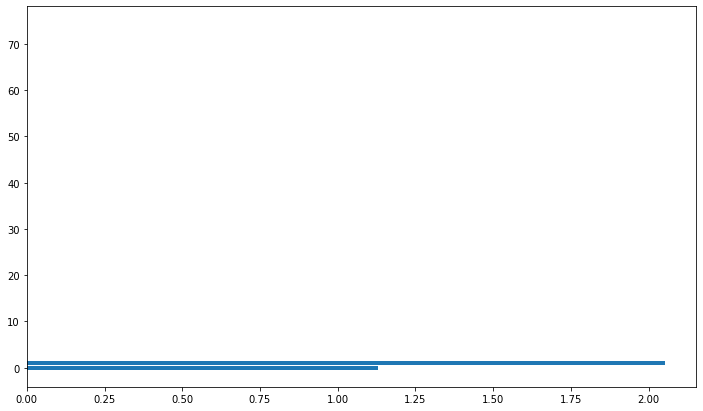

In [48]:
plt.figure(figsize=(12,7))
plt.barh(y = list(range(degree)), width=pipe['reg'].coef_.flatten())

In [49]:
pipe['reg'].coef_

array([1.13081851, 2.0514064 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [50]:
pipe['reg'].intercept_

array([4.92505072])

Lasso has discovered that our data is based on a quadratic equation!